<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/nlp/%5Bclassify%5D__TH_EBL_CNN_or_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Data and Library Installation

In [1]:
#download data
!gdown --id :) 
!gdown --id :) 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-avUDygRCGvAiPplmc6MundS_PpnohRv
To: /content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx
100% 3.87M/3.87M [00:00<00:00, 197MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=106OVRPIQQBppganRnCZigxQh6-Zyvqit
To: /content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx
100% 141k/141k [00:00<00:00, 86.7MB/s]


In [2]:
#libraby 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import plot_model

In [3]:
train = pd.read_excel('/content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx')
test = pd.read_excel('/content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx')

In [4]:
train.head(5)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local
0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...
1,1,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainDataV4_RetagCLS-12_Sampling53_P...,NaN,NaN,SocialMedia,Twitter,5fffc6bcb08b583a24679d59,Q202106_5805,Q202106_5805_1,ปกติจะไม่ชอบlog in ใดๆในคอมคนอื่นหรือสำนักงานใ...,ปกติจะไม่ชอบlog in ใดๆในคอมคนอื่นหรือสำนักงานใ...,Security,12,neutral,o,ปกติ|จะ|ไม่ชอบ| |log| |in| |ใดๆ| |ใน|ค|อม|คนอื...
2,2,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1200_2022...,Krungthai_NEXT,krungthai,SocialMedia,facebook,10161808181448916_1330115550790924,Q2207_636,Q2207_636_1,Krungthai Care ณ. ตอนนี้ยอดก็ยังไม่เข้าค่ะ ถ้า...,Krungthai Care ณ. ตอนนี้ยอดก็ยังไม่เข้าค่ะ ถ้า...,"Product and Service, System",7,negative,n,ktb| |care| |ณ|.| |ตอนนี้|ยอด|ก็|ยัง|ไม่|เข้า|...
3,3,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainSCB-SocialFilterV2_Sampling2750...,NaN,NaN,SocialMedia,Twitter,27634345,Q202106_961,Q202106_961_1,@scb_thailand เรียน scb ขอเบอร?ตืดต่อเพราะคุย ...,@scb_thailand เรียน scb ขอเบอร?ตืดต่อเพราะคุย ...,Staff Quality,4,negative,n,scb_thailand| |เรียน| |scb| |ขอ|เบอร| |ตืด|ต่อ...
4,4,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainSCB-SocialFilterV2_Sampling2750...,NaN,NaN,SocialMedia,Twitter,28297653,Q202106_2021,Q202106_2021_1,ไอเลิ้บ TMB All Free มาก แต่ช่วยพัฒนาแอพให้สเถ...,ไอเลิ้บ TMB All Free มาก,"Product and Service, Usage and Condition",8,positive,p,ไอ|เลิ้บ| |tmb_all_free| |มาก|


In [5]:
train['Human_CategoryID'].sort_index(ascending=True).value_counts()

7     3275
8     2454
13    2133
5     1163
6     1109
4      522
10     379
3      377
11     232
1      185
9      153
12     152
2       16
Name: Human_CategoryID, dtype: int64

#Create a Vocabulary

In [6]:
from collections import Counter

vocab = Counter()
def data_to_vocab(df):
  for verbatim in df['Text_ws_local']:
    tokens = verbatim.split()
    tokens = [word for word in tokens if len(tokens) > 4] #at first = 1, CNN GMP is better with >4 for ~2%
    vocab.update(tokens)

data_to_vocab(train)

print(len(vocab))
vocab.most_common(20)

46943


[('|scb|', 1518),
 ('|friendtag|', 625),
 ('|2|', 512),
 ('|kbank|', 403),
 ('|บาท|', 360),
 ('|1|', 340),
 ('|3|', 329),
 ('|5|', 298),
 ('|tmb|', 251),
 ('|call_center|', 250),
 ('|atm|', 249),
 ('atm|', 245),
 ('|scb_easy|', 201),
 ('|telephonetag|', 199),
 ('|app|', 199),
 ('|กรุงไทย|', 198),
 ('|-|', 184),
 ('|sms|', 178),
 ('|ktc|', 176),
 ('|ของ|', 164)]

In [7]:
min_occurence = 2
tokens = [k for k, c in vocab.items() if c >= min_occurence]

In [8]:
def save_list(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()
  
save_list(tokens, 'vocab.txt')

#Data Processing: Embedding & the Model

In [9]:
#Load the vocab as above
def load_doc(filename):
  file = open(filename, 'r')
  text = file.read()
  file.close()
  return text

vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

print(vocab)

{'|สถาบันการเงิน|ชื่อดัง|', '|spotify|', '|ธนาคารไทยพาณิชย์|', '|ร้าน|ป|ริ้น|ยัง|ไม่|เปิด|นี่|เลย|จะ|เปิดบัญชี|เพื่อ|จ่ายเงิน|', '|ไม่|ได้รับ|', '|ติด|', '|gwallet|', '|ไม่ทราบ|ว่า|', '|ยัง|เป็น|นิสิต|อยู่|', '|ไม่มี|สมุดบัญชี|', '|กรุงไทย_axa|', '|20.00|', '|scb_first|', '|ไป|ไหม|นะ|', '|ก็|ล่ม|', '|ฮือ|', '|ค่าบริการ|', '|อี|หน้า|เหี้ย', '|pin|', '|กด|เข้าไป|', '|กด|ไม่ได้|', '|pass|', '|เขา|บอก|', '6|', 'พอดี|', '|โค|วิท|', '|ค่า|', '|ทั้งๆ', '|ขอบคุณ|ครับ', '|ยกตัวอย่างเช่น|', '|ไป|ตั้งแต่|วัน|ที่', '|bls|', '|ขั้นต่ำ|เปิด|พอร์ต|ห้า|แสน|บาท|', '13|', '|61|', '|พอร์ต|', '|express|', '|ดอกเบี้ย|ยิ่ง|เยอะ|ค่ะ', '|โค|วิด_19', '|ต้นๆ|', '|rabbit|', '|ยืนยัน|ตัวตน|ปุ๊บ|', '|ครั้งแรก|', '|tot|', '|ต้อง|ไป|สาขา|', '|all|', '|download|', '|มี|ค|', '|สินเชื่อ|', '|1.|', '|งง', '|ใน|แอ|ฟ|มัน|เป็น|ออ|มท|ร|พ|ย|์|', '|ให้|', '|ที่|ตู้', '|ลองดู|นะคะ', '|verify|', '|มี|ไหม|', '|ล่ม|อีก|', '|0|', '|ปลายทาง|kbank|', '|ค่ะ|', '|ยัง|ไม่|เข้า|เลย|ครับ', '|passion|', '|scbeasyapp|', '|พวก|', '|กดเงิน|ไ

In [10]:
#Turn Series into lists
train_docs = train['Text_ws_local'].tolist()
test_docs = test['Text_ws_local'].tolist()

In [11]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
#one hot-enconding for the text like > https://stackoverflow.com/questions/69026891/what-is-keras-tokenizer-fit-on-texts-doing
tokenizer.fit_on_texts(train_docs)
encoded_docs = tokenizer.texts_to_sequences(train_docs)

In [12]:
#Find the most max lengths of word in verbatims from both train and test
max_length_train = max([len(s.split()) for s in train_docs])
max_length_test  = max([len(s.split()) for s in test_docs])
max_length = max([max_length_train, max_length_test])
print("Max Length of Words: ", max_length)

#Padding in order to equalize some verbatims that do not contain the same length of the max length verbatim
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#define the labels
ytrain = np.array(train['Human_CategoryID'].tolist())

Max Length of Words:  66


In [13]:
#Do the same for the test set
encoded_docs_test = tokenizer.texts_to_sequences(test_docs)

Xtest = pad_sequences(encoded_docs_test, maxlen=max_length)
ytest = np.array(test['Human_CategoryID'].tolist())

In [14]:
#Count unique classes
print(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())

13 12


In [15]:
#Count unique classes
num_classes = max(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())
print(num_classes)

13


In [16]:
from tensorflow.keras.utils import to_categorical

#Multi class problems need one-hot encoding on y
#why - 1 on ytrain and ytest? can follow the linke below
#https://stackoverflow.com/questions/56204731/the-method-np-utils-to-categorical-give-me-an-error/59002957#59002957
ytrain =  to_categorical(ytrain-1, num_classes=num_classes)
ytest = to_categorical(ytest-1, num_classes=num_classes)

In [17]:
vocab_size = len(tokenizer.word_index)+1

#model

##CNN1 MP1D F D256 DO0.25 D13: 25

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 50, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())
#MaxPool1D: pool_size=2: 28
#MaxPool1D: pool_size = 2, strides = 2: 24.421594
#MaxPool1D(): w/o specification: 26-30

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 50)            630450    
                                                                 
 conv1d (Conv1D)             (None, 64, 32)            4832      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 32, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=64, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
152/152 [==============================] - 3s 12ms/step - loss: 1.9239 - acc: 0.3388 - val_loss: 1.6052 - val_acc: 0.4498
Epoch 2/10
152/152 [==============================] - 2s 10ms/step - loss: 1.4615 - acc: 0.5315 - val_loss: 1.4092 - val_acc: 0.5366
Epoch 3/10
152/152 [==============================] - 2s 11ms/step - loss: 1.0798 - acc: 0.6729 - val_loss: 1.3319 - val_acc: 0.5761
Epoch 4/10
152/152 [==============================] - 2s 11ms/step - loss: 0.7818 - acc: 0.7552 - val_loss: 1.4371 - val_acc: 0.5720


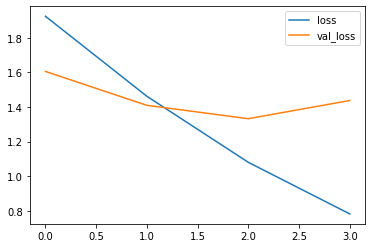

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

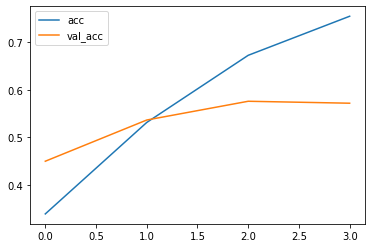

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
print(Xtest.shape, ytest.shape)

(389, 66) (389, 13)


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 2ms/step - loss: 2.2708 - acc: 0.2545
Test Accuracy: 25.449872


##LSTM CNN1 MP1D F D512 D256 D13: 33

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))
model.add(LSTM(50, return_sequences=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D())

#CNN + LSTM
#MaxPool1D: pool_size=2: 30
#MaxPool1D: w/o specification: 30

#LSTM + CNN
#MaxPool1D: w/o specification: 33.676094

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 66, 100)           1260900   
                                                                 
 lstm (LSTM)                 (None, 66, 50)            30200     
                                                                 
 conv1d_1 (Conv1D)           (None, 64, 32)            4832      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 32, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 18s 50ms/step - loss: 1.6686 - acc: 0.4402 - val_loss: 1.4007 - val_acc: 0.5494
Epoch 2/10
304/304 [==============================] - 16s 52ms/step - loss: 1.1711 - acc: 0.6323 - val_loss: 1.2858 - val_acc: 0.5811
Epoch 3/10
304/304 [==============================] - 16s 52ms/step - loss: 0.8441 - acc: 0.7297 - val_loss: 1.3791 - val_acc: 0.5868


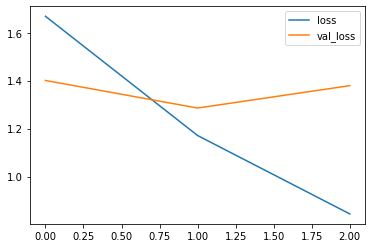

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

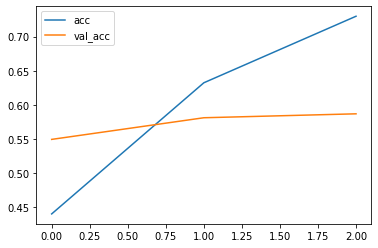

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
print(ytrain.shape, ytest.shape)

(12150, 13) (389, 13)


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 11ms/step - loss: 2.0077 - acc: 0.3342
Test Accuracy: 33.419022


##CNN1 LSTM GMP1D F D512 D256 D13: 44

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D

In [ ]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(LSTM(50, return_sequences=True))

model.add(GlobalMaxPooling1D())
#CNN LSTM GMP1D(w/o spec): 44, 49
#LSTM CNN GMP1D(w/o spec): 38, 47

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 66, 100)           1260900   
                                                                 
 conv1d_2 (Conv1D)           (None, 64, 32)            9632      
                                                                 
 lstm_1 (LSTM)               (None, 64, 50)            16600     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten_2 (Flatten)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 512)               26112     
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 17s 48ms/step - loss: 1.8032 - acc: 0.3860 - val_loss: 1.5142 - val_acc: 0.5049
Epoch 2/10
304/304 [==============================] - 14s 46ms/step - loss: 1.3151 - acc: 0.5926 - val_loss: 1.3291 - val_acc: 0.5840
Epoch 3/10
304/304 [==============================] - 14s 47ms/step - loss: 1.0169 - acc: 0.6872 - val_loss: 1.3395 - val_acc: 0.5926


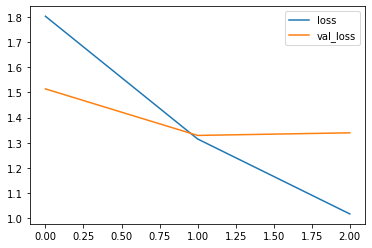

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

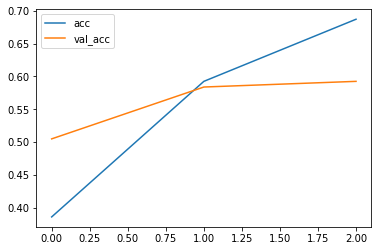

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
print(ytrain.shape, ytest.shape)

(12150, 13) (389, 13)


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 11ms/step - loss: 1.9175 - acc: 0.4447
Test Accuracy: 44.473007


##CNN1, 32 GMP1D D256 D13: 56

In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [ ]:
from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())

#CNN GMP1D(w/o spec): 56.812340
#2CNN GMP1D(w/o spec): 53.470439
#CNN BN GMP1D(w/o spec): 52.956301


model.add(Flatten())
#Flatten(): 56
#w/o Flatten(): 55

model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 66, 100)           1260900   
                                                                 
 conv1d_3 (Conv1D)           (None, 64, 32)            9632      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 256)               8448      
                                                                 
 dense_9 (Dense)             (None, 13)                3341      
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Current val_loss =  1.24
history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=64, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
152/152 [==============================] - 3s 15ms/step - loss: 1.9412 - acc: 0.3547 - val_loss: 1.6184 - val_acc: 0.4695
Epoch 2/10
152/152 [==============================] - 2s 13ms/step - loss: 1.4102 - acc: 0.5634 - val_loss: 1.3184 - val_acc: 0.5757
Epoch 3/10
152/152 [==============================] - 2s 13ms/step - loss: 1.0083 - acc: 0.6940 - val_loss: 1.2897 - val_acc: 0.5938
Epoch 4/10
152/152 [==============================] - 2s 13ms/step - loss: 0.6871 - acc: 0.7913 - val_loss: 1.3680 - val_acc: 0.5984


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 3ms/step - loss: 1.4314 - acc: 0.5681
Test Accuracy: 56.812340


##CNN1,128(5) GMP1D D13: 60

In [52]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [53]:
from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))

model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, 66, 1000)          12609000  
                                                                 
 conv1d_34 (Conv1D)          (None, 62, 128)           640128    
                                                                 
 global_max_pooling1d_33 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_26 (Dense)            (None, 13)                1677      
                                                                 
Total params: 13,250,805
Trainable params: 13,250,805
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [55]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Current val_loss =  1.24
history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=64, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
152/152 [==============================] - 25s 158ms/step - loss: 1.5796 - acc: 0.4867 - val_loss: 1.2106 - val_acc: 0.5938
Epoch 2/10
152/152 [==============================] - 23s 155ms/step - loss: 0.8955 - acc: 0.7140 - val_loss: 1.0973 - val_acc: 0.6346
Epoch 3/10
152/152 [==============================] - 24s 158ms/step - loss: 0.4050 - acc: 0.8940 - val_loss: 1.1123 - val_acc: 0.6436


In [56]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 13ms/step - loss: 1.2650 - acc: 0.6067
Test Accuracy: 60.668379


## CNN1,512&1024,(5,7,10) GMP1D D13: 53-61

In [18]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
import tensorflow as tf
from keras.layers.pooling import GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
filters = [512, 1024]
kernels = [5, 7, 10]

#Define our model
for filter in filters:
  for kernel in kernels:
    model = Sequential()
    model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
    model.add(Conv1D(filter, kernel , activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(num_classes, activation='softmax'))

    #put early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['acc'],)
    
    #train the model
    history = model.fit(Xtrain, ytrain, 
                      epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                      validation_split=0.2,
                      callbacks=[early_stopping])
  
    #evaludate the model
    loss, acc = model.evaluate(Xtest, ytest)
    print("===========================================")
    print(f"Filter: {filter}")
    print(f"Kernel: {kernel}")
    print('Test Accuracy: %f' % (acc*100)) #79.333335 (CNN kernel = 10), 78 (CNN kernel = 5)
    print("===========================================")

Epoch 1/10
304/304 [==============================] - 61s 199ms/step - loss: 1.3817 - acc: 0.5477 - val_loss: 1.0934 - val_acc: 0.6362
Epoch 2/10
13/13 [==============================] - 0s 19ms/step - loss: 1.3208 - acc: 0.6015
Filter: 512
Kernel: 5
Test Accuracy: 60.154241
Epoch 1/10
304/304 [==============================] - 89s 290ms/step - loss: 1.3679 - acc: 0.5516 - val_loss: 1.0922 - val_acc: 0.6407
Epoch 2/10
13/13 [==============================] - 0s 29ms/step - loss: 1.3592 - acc: 0.5861
Filter: 512
Kernel: 10
Test Accuracy: 58.611828
Epoch 1/10
304/304 [==============================] - 86s 281ms/step - loss: 1.3469 - acc: 0.5615 - val_loss: 1.0992 - val_acc: 0.6362
Epoch 2/10
13/13 [==============================] - 0s 30ms/step - loss: 1.3459 - acc: 0.6144
Filter: 1024
Kernel: 5
Test Accuracy: 61.439592
Epoch 1/10
304/304 [==============================] - 142s 464ms/step - loss: 1.3578 - acc: 0.5546 - val_loss: 1.1063 - val_acc: 0.6296
Epoch 2/10
13/13 [================

In [ ]:
#prediction
y_pred = model.predict(Xtest)

#Change one hot answer to be single digit as follows 
#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel

rounded_labels_ypred = np.argmax(y_pred, axis=1)
rounded_labels_ytest = np.argmax(ytest,axis=1)

##3CNN1,(128,128,128),(6,8,10) 3DO0.1 3GMP1D CONCAT D13: 61

In [50]:
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras import Input
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed, concatenate

In [44]:
max_length_train = max([len(s.split()) for s in train_docs])
max_length_test  = max([len(s.split()) for s in test_docs])
max_length = max([max_length_train, max_length_test])
print("Max Length of Words: ", max_length)

Max Length of Words:  66


In [51]:
# create the model
model = Sequential()
inputs = Input(shape=(max_length,))

# channel 1
embedding1 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv1 = Conv1D(128, 6, activation='relu')(embedding1)
drop1 = Dropout(0.1)(conv1)
pool1 = GlobalMaxPooling1D()(drop1)
# channel 2
embedding2 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv2 = Conv1D(128, 8, activation='relu')(embedding2)
drop2 = Dropout(0.1)(conv2)
pool2 = GlobalMaxPooling1D()(drop2)
# channel 3
embedding3 = Embedding(vocab_size, 1000, trainable=True)(inputs)
conv3 = Conv1D(128, 10, activation='relu')(embedding3)
drop3 = Dropout(0.1)(conv3)
pool3 = GlobalMaxPooling1D()(drop3)

# merge
merged = concatenate([pool1, pool2, pool3])

# Fully connected 
outputs = Dense(num_classes, activation='softmax')(merged) #1 Dense better than 2 or three Denses

model = Model(inputs=[inputs], outputs=outputs)
model.summary()

from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

#Learning Rate = 0.01, acc = 40%

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

train_y = [x-1 for x in train['Human_CategoryID'].tolist()]

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                   
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    class_weight=class_weights)

loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 66)]         0           []                               
                                                                                                  
 embedding_31 (Embedding)       (None, 66, 1000)     12609000    ['input_3[0][0]']                
                                                                                                  
 embedding_32 (Embedding)       (None, 66, 1000)     12609000    ['input_3[0][0]']                
                                                                                                  
 embedding_33 (Embedding)       (None, 66, 1000)     12609000    ['input_3[0][0]']                
                                                                                              

#Plot Confusion and Classification Report

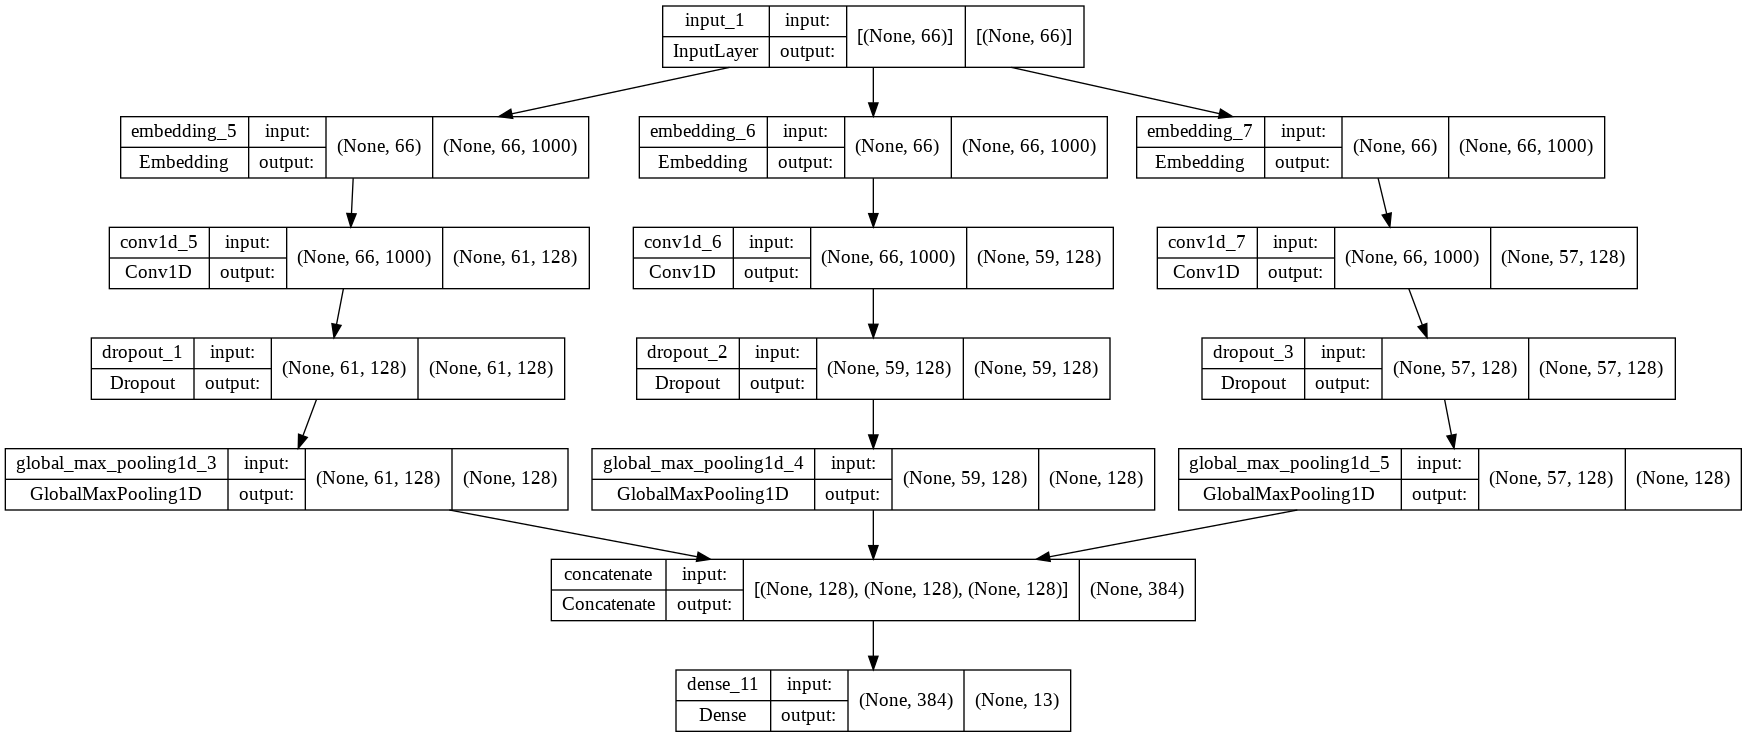

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# from google.colab import files
# files.download('model_plot.png')

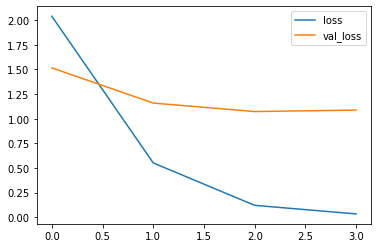

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

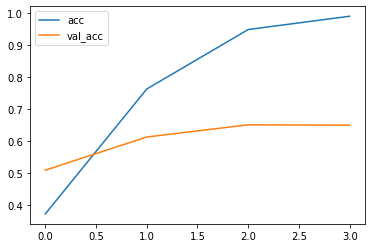

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
#Find dict of label ids and names.
if train['Human_CategoryID'].nunique() < test['Human_CategoryID'].nunique():
  print('train_unique_classes')
  classes_with_id_dict = {id-1: labels for id, labels in zip(train['Human_CategoryID'], train['Human_Category'])}
  print(len(classes_with_id_dict))
else:
  print('test_unique_classes')
  classes_with_id_dict = {id-1: labels for id, labels in zip(test['Human_CategoryID'], test['Human_Category'])}
  print(len(classes_with_id_dict))

classes_with_id_dict

test_unique_classes
12


{0: 'Accessibility',
 2: 'Company Brand',
 3: 'Staff Quality',
 4: 'Timing',
 5: 'Product and Service, Benefit',
 6: 'Product and Service, System',
 7: 'Product and Service, Usage and Condition',
 8: 'Product and Service, Convenience',
 9: 'Product and Service, Variety',
 10: 'Product and Service, Decision',
 11: 'Security',
 12: 'No Category'}

In [ ]:
#get an labels array in the conseuctive order based on id number.
train_unique_classes = train['Human_CategoryID'].nunique()
test_unique_classes = test['Human_CategoryID'].nunique()

#find the label total
if train['Human_CategoryID'].nunique() > test['Human_CategoryID'].nunique():
  print('test_unique_classes')
  classes_with_id = test_unique_classes
else:
  print('train_unique_classes')
  classes_with_id = train_unique_classes

#convert a dict to an array
classes_array = ["" for x in range(classes_with_id+1)]

for id, label in classes_with_id_dict.items():
  classes_array[id] = label

#delete empty string for classification report
classes_array = [label for label in classes_array if label != ""]
classes_array
print(len(classes_array))

test_unique_classes
12


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(rounded_labels_ytest, rounded_labels_ypred, target_names=classes_array, zero_division=0))

                                          precision    recall  f1-score   support

                           Accessibility       0.50      0.43      0.46         7
                           Company Brand       0.38      0.42      0.40        12
                           Staff Quality       0.47      0.47      0.47        17
                                  Timing       0.64      0.75      0.69        28
            Product and Service, Benefit       0.73      0.59      0.66        32
             Product and Service, System       0.71      0.88      0.79        84
Product and Service, Usage and Condition       0.62      0.70      0.65        92
        Product and Service, Convenience       0.50      0.18      0.27        11
            Product and Service, Variety       0.38      0.42      0.40        12
           Product and Service, Decision       0.44      0.40      0.42        10
                                Security       0.67      0.67      0.67         3
               

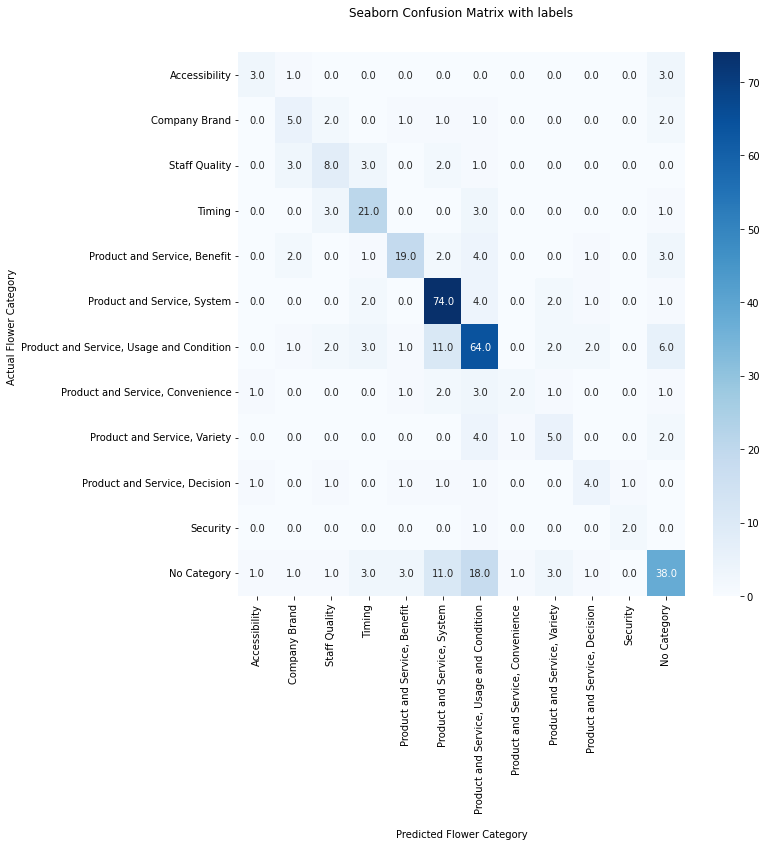

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(rounded_labels_ytest, rounded_labels_ypred)

fig, ax = plt.subplots(figsize=(10,10))    
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax, fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(classes_array, rotation=90)
ax.yaxis.set_ticklabels(classes_array, rotation=0)

## Display the visualization of the Confusion Matrix.
plt.show()

figure = ax.get_figure()    
figure.savefig("cf_matrix.png", pad_inches= 12, dpi=400)